In [2]:
import os
import os.path as op
# import mne
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from scipy.stats import ttest_1samp

In [14]:
root = Path('../data/bids/derivatives/decoding/')
df = pd.DataFrame()
for file in root.rglob("*/*"):
    cond = re.findall('wavelet_(\d{1,2})', file.name)[0]
    sub = re.findall('sub-(\d{1,2})', file.name)[0]
    d = np.load(file)
    data_dict = {
#                  't': list(range(917)),
                 'cond': [cond]*917,
                 'sub': [sub]*917,
                 'accuracies': d,
                }
    sub_df = pd.DataFrame.from_dict(data_dict)
    df = pd.concat([df, sub_df], ignore_index = False)
df

,cond,sub,accuracies
0,31,7,0.507371
1,31,7,0.508795
2,31,7,0.511024
3,31,7,0.512200
4,31,7,0.514281
...,...,...,...
912,32,29,0.495005
913,32,29,0.492443
914,32,29,0.491275
915,32,29,0.491018


<AxesSubplot:xlabel='index', ylabel='accuracies'>

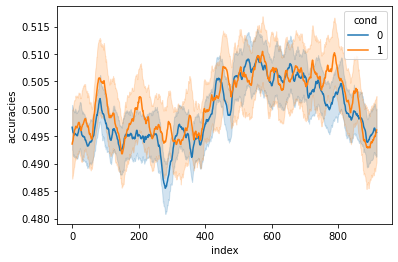

In [17]:
# df_sns = df.T
# cols = list(df_sns.columns)
# filter_cols = re.compile('(sub-\d{1,2})_')
# subs = list(map(filter_cols.findall, cols))
# subs = list(itertools.chain(*subs))
# df_sns.columns = subs
# df_sns = df_sns.reset_index()

# Pivot data
# df_sns = pd.wide_to_long(df_sns, stubnames = 'sub-', i = 'index', j = 'sub')
# df_sns.columns = ['accuracy']
# df_sns = df_sns.reset_index()

df_sns = df.reset_index()
df_sns = df_sns.replace({'11': 1,
                 '22': 1,
                 '33': 1,
                 '12': 0,
                 '13': 0,
                 '21': 0,
                 '23': 0,
                 '31': 0,
                 '32': 0,
                })

sns.lineplot(data = df_sns, x = "index", y = "accuracies", hue = "cond")

In [ ]:


# Reshape data for seaborn

# Rename columns for easy transformation
df_sns = df.T
cols = list(df_sns.columns)
filter_cols = re.compile('(sub-\d{1,2})_')
subs = list(map(filter_cols.findall, cols))
subs = list(itertools.chain(*subs))
df_sns.columns = subs
df_sns = df_sns.reset_index()

# Pivot data
df_sns = pd.wide_to_long(df_sns, stubnames = 'sub-', i = 'index', j = 'sub')
df_sns.columns = ['accuracy']
df_sns = df_sns.reset_index()



In [ ]:


# Plot
sns.lineplot(data = df_sns, x = "index", y = "accuracy")

